## Modules

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches, ticker
import seaborn as sns
import os
import geopandas
import cartopy.crs as ccrs
import cartopy
import numpy as np
import shapely
import statsmodels.api as sma
import math
import scipy

## Paths

In [20]:
WILDCARDS = ["all", "chromosome", "full", "30"]


READS_ORIGIN = WILDCARDS[0]
LOCUS_NAME = WILDCARDS[1]
PRUNE = WILDCARDS[2]
MISSING_DATA = WILDCARDS[3]

project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/denmark/"
results_dir = project_dir
metadata_dir = os.path.join(project_dir, "metadata", "{}".format(READS_ORIGIN) )

archaeology_path    = project_dir + "metadata/{}/metadata_archaeology.txt".format(READS_ORIGIN)
beast_log_path      = project_dir + "beast/{}/chromosome/full/filter{}/relaxed_clock/dates/run/beast_log.tsv".format(READS_ORIGIN, MISSING_DATA)
out_dir             = project_dir + "beast/{}/chromosome/full/filter{}/relaxed_clock/dates/run/".format(READS_ORIGIN, MISSING_DATA)

CURRENT_YEAR = 2021
BURNIN = 0.1

# ------------------------------------------
# Geo
CRS = "epsg:3857"
#CRS_EPSG = ccrs.epsg('3857')
#world_polygons = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

pd.set_option("display.max_rows", 10, "display.max_columns", None)

np.random.seed(1235423134)

NO_DATA_CHAR = "NA"
ALPHA = 0.05

# ------------------------------------------
# Geo
CRS = "epsg:3857"
CRS_EPSG = ccrs.epsg('3857')
world_polygons = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# ------------------------------------------
# Plotting
plt.rcParams['axes.facecolor']    ='white'
plt.rcParams['savefig.facecolor'] ='white'
plt.rcParams['savefig.dpi']       = 400
plt.rcParams['svg.fonttype']      = 'none'

---
# Archaeology

In [42]:
archaeology_df = pd.read_csv(archaeology_path, sep="\t", encoding="latin-1")
archaeology_df.fillna("NA", inplace=True)

date_cols = ["Jesper Finalized", "Julia Adjustments - Jesper to review", "Individual date range"]



bin_width = 50
min_date = 1000
max_date = 1800

# Convert dates
for rec in archaeology_df.iterrows():
    sample = rec[0]
    print(rec[1]["Laboratory ID"])
    i = 0
    date_str = rec[1][date_cols[i]]
    
    while "-" not in date_str:
        i += 1
        date_str = rec[1][date_cols[i]]
        
        
        
    date_list = date_str.replace("AD","").replace(" ","").split("-")
    date_list = [int(d) for d in date_list]
    
    if date_list[0] < min_date:       
        archaeology_df.drop(sample, inplace=True)
    elif date_list[1] > max_date:
        archaeology_df.drop(sample, inplace=True)        
        
    else:    
        archaeology_df.at[sample,"start_date"] = date_list[0]
        archaeology_df.at[sample,"end_date"] = date_list[1]
    
    
archaeology_df.sort_values("start_date", inplace=True)
#archaeology_df = archaeology_df[90:100]
print("Samples:", len(archaeology_df))
display(archaeology_df)


LD52
LR20
LP127
LP128
LP129
LP130
LP131
LP132
LP133
LP134
LP135
LP136
LP137
LP138
LP139
LP140
LP141
LP142
LP143
LP144
LP145
LP149
LP150
LP151
LP152
LP153
LP155
LP157
LP158
LP159
LP160
LP161
LP162
LP163
LP164
LP165
LP166
LP167
LD24
LD25
LD26
LD27
LD28
LR13
LR14
LD115
LD118
LD119
LD81
LD82
LD83
LD84
LR46
LD108
LD109
LD110
LD55
LD56
LD57
LD58
LR27
LR28
LR29
LR30
LR32
LR33
LD116
LD117
LD120
LD54
LD79
LD80
LD88
LR22
LR23
LR45
LP171
LP172
LP173
LP217
LP218
LP219
LP220
LP221
LP222
LP223
LP224
LP225
LP226
LP227
LP228
LP229
LP230
LP231
LP232
LD50
LR19
LP371
LP372
LP374
LP377
LP378
LP379
LP388
LP389
LP391
LP380
LP212
LP381
LP174
LP175
LP177
LP178
LP179
LP180
LP181
LP182
LD106
LD42
LD43
LD46
LD48
LP387
LP386
LP147
LP154
LP156
LP169
LP170
LD78
LP199
LP200
LP201
LP202
LP203
LP204
LP205
LP148
LP185
LP186
LP188
LP189
LP190
LP191
LP192
LP193
LP194
LP195
LP196
LP197
LP198
LP373
LP376
LP187
LP206
LP207
LP208
LP209
LP210
LP211
LP213
LP214
LP215
LP216
LD44
LD45
LD53
LR18
LP382
LP383
LP390
LD111
LD112
LD11

,Laboratory ID,Individual ID,Element Used,Country,Province,Municipality,Cemetery,Cemetery/phase date range,Site code,Time Point,Arm Position,Dating technique,Individual date range,Julia Adjustments - Jesper to review,Jesper Finalized,Included in analyses,cMYC copies per uL (avg),pla Positive PCR Replicates,Plague Status,Mean Mitochondrial Coverage,Mitochondrial Haplotype,start_date,end_date
0,LD52,Gr FO x241,Tooth,Denmark,Central Denmark Region,Viborg Municipality,Faldborg,1100-1555 AD,VSM 29F,Pre-BD,Pre (A),Arm position,1100-1350,1000 - 1250 AD,1000 - 1250 AD,Plague PCR detection,NA,NA,NA,NA,NA,1000.0,1250.0
1,LR20,Gr HF 287,Tooth,Denmark,Central Denmark Region,Viborg Municipality,Faldborg,1100-1555 AD,VSM 29F,Pre-BD,Pre (AA),Arm position,1100-1350 AD,1000 - 1250 AD,1000 - 1250 AD,Plague PCR detection,NA,1,NA,--,--,1000.0,1250.0
22,LP150,V,Tooth,Denmark,Central Denmark Region,Aarhus Municipality,Nordby,1050-1250 AD,FHM 3970,Pre-BD,Before,Cemetery Dating,1050-1250 AD,1050-1250 AD,1050-1250 AD,"GWAS, exon, neutral, Plague PCR Detection",20.5,NA,NA,H1bd,174,1050.0,1250.0
23,LP151,EB,Tooth,Denmark,Central Denmark Region,Aarhus Municipality,Nordby,1050-1250 AD,FHM 3970,Pre-BD,Before,Cemetery Dating,1050-1250 AD,1050-1250 AD,1050-1250 AD,"GWAS, neutral, Plague PCR detection",85.8,NA,NA,H3g1a,219,1050.0,1250.0
24,LP152,GL,Tooth,Denmark,Central Denmark Region,Aarhus Municipality,Nordby,1050-1250 AD,FHM 3970,Pre-BD,Pre,Cemetery Dating,1050-1250 AD,1050-1250 AD,1050-1250 AD,Plague PCR detection,NA,1,NA,NA,NA,1050.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,LD16,A2549 x2598,Tooth,Denmark,Central Denmark Region,Horsens Municipality,Klosterkirken,1535-1856 AD,HOM 1272,Post-BD,Post-Medeival,Burial Type / Goods,1535-1856 AD,1750 - 1800 AD,1600 - 1800,Plague PCR Detection,NA,NA,NA,NA,NA,1600.0,1800.0
267,LD17,A2552 x2605,Tooth,Denmark,Central Denmark Region,Horsens Municipality,Klosterkirken,1535-1856 AD,HOM 1272,Post-BD,Post-Medeival,Burial Type / Goods,1535-1856 AD,1750 - 1800 AD,1600 - 1800,Plague PCR Detection,NA,NA,NA,H5b1,44,1600.0,1800.0
269,LD19,A2721 x2838,Tooth,Denmark,Central Denmark Region,Horsens Municipality,Klosterkirken,1535-1856 AD,HOM 1272,Post-BD,Post-Medieval,Burial Type / Goods,1535-1856 AD,1750 - 1800 AD,1600 - 1800,Plague PCR Detection,NA,NA,NA,K2b1a4,253,1600.0,1800.0
257,LD100,A2669 x2770,Tooth,Denmark,Central Denmark Region,Horsens Municipality,Klosterkirken,1535-1856 AD,HOM 1272,Post-BD,Post-Medieval,Burial Type / Goods,1535-1856 AD,1750 - 1800 AD,1600 - 1800,"GWAS, exon, neutral, Plague PCR Detection",30.2,NA,NA,U4a2,437,1600.0,1800.0


## Individual Date Distribution

{1000: {'n': 2, 'plague_positive': 0}, 1050: {'n': 38, 'plague_positive': 0}, 1100: {'n': 78, 'plague_positive': 1}, 1150: {'n': 89, 'plague_positive': 2}, 1200: {'n': 104, 'plague_positive': 3}, 1250: {'n': 165, 'plague_positive': 4}, 1300: {'n': 115, 'plague_positive': 3}, 1350: {'n': 91, 'plague_positive': 3}, 1400: {'n': 139, 'plague_positive': 9}, 1450: {'n': 91, 'plague_positive': 10}, 1500: {'n': 86, 'plague_positive': 9}, 1550: {'n': 33, 'plague_positive': 2}, 1600: {'n': 69, 'plague_positive': 0}, 1650: {'n': 69, 'plague_positive': 0}, 1700: {'n': 69, 'plague_positive': 0}, 1750: {'n': 50, 'plague_positive': 0}, 1800: {'n': 50, 'plague_positive': 0}}
{1000: {'n': 2, 'plague_positive': 0}, 1051: {'n': 38, 'plague_positive': 0}, 1101: {'n': 78, 'plague_positive': 1}, 1151: {'n': 89, 'plague_positive': 2}, 1201: {'n': 104, 'plague_positive': 3}, 1251: {'n': 165, 'plague_positive': 4}, 1301: {'n': 115, 'plague_positive': 3}, 1351: {'n': 91, 'plague_positive': 3}, 1401: {'n': 139, 

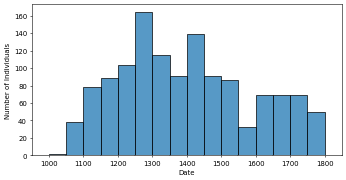

In [38]:
date_dict = {}


start_dates = [int(d) for d in archaeology_df["start_date"]]
end_dates = [int(d) for d in archaeology_df["end_date"]]
plague_statuses = [status for status in archaeology_df["Plague Status"]]

for start,end,status in zip(start_dates, end_dates, plague_statuses):
    # Round start_date down to nearest 50
    # Round end_date up to nearest 50
    start = start - (start % 50)
    end = end + 50 - (end % 50)
    # Have to add extra bin because range is not inclusive
    dates = range(start, end, bin_width)
    for d in dates:
        if d not in date_dict:
            date_dict[d] = {"n": 1, "plague_positive": 0}
        else:
            date_dict[d]["n"] += 1
        if status == "Positive":
            date_dict[d]["plague_positive"] += 1
        


# Adjust all but first date, remove last date
new_date_dict = {}
print(date_dict)

for d in date_dict.keys():
    if d == min(date_dict.keys()):
        new_date_dict[d] = date_dict[d]
    elif d == max(date_dict.keys()):
        continue
    else: 
        new_date_dict[d + 1] = date_dict[d]
        
date_dict = new_date_dict
print(date_dict)


date_data = []
for k,v in date_dict.items():
    date_data += [k] * v["n"]
    
DPI=50
FIGSIZE=[8,4]

## All
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE, dpi=DPI)

sns.histplot(
    ax=ax,    
    x=date_data,
    binwidth=bin_width,
    #discrete=True,
)

#for patch in ax.patches:
#    patch.set_width(10)


ax.set_xlim(min_date - bin_width, max_date + bin_width)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(bin_width))
ax.xaxis.set_major_locator(ticker.MultipleLocator(bin_width * 2))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Individuals")

# Save
out_path = os.path.join(metadata_dir, "timeline_individuals")
print(out_path)
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")

## Date Categories

In [31]:
date_cat_dict = {
    "1000-1300": {
        "start":1000,
        "end":1299,
        "n":0,
        "plague-positive":0,
    },
    "1300-1650": {
        "start":1300,
        "end":1649,
        "n":0,
        "plague-positive":0,        
    },
    "1650-1800": {
        "start":1650,
        "end":1800,
        "n":0,
        "plague-positive":0,        
    },    
}

for start,end,status in zip(start_dates, end_dates, plague_statuses):
    for cat in date_cat_dict:
        if (start >= date_cat_dict[cat]["start"]
            and end <= date_cat_dict[cat]["end"]):            
            date_cat_dict[cat]["n"] += 1
            if status != NO_DATA_CHAR:
                date_cat_dict[cat]["plague-positive"] += 1 

print(date_cat_dict)

{'1000-1300': {'start': 1000, 'end': 1299, 'n': 54, 'plague-positive': 1}, '1300-1650': {'start': 1300, 'end': 1649, 'n': 64, 'plague-positive': 9}, '1650-1800': {'start': 1650, 'end': 1800, 'n': 0, 'plague-positive': 0}}


### Tip Dates

---
# BEAST Prior

/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/denmark/metadata/all/prior_denmark


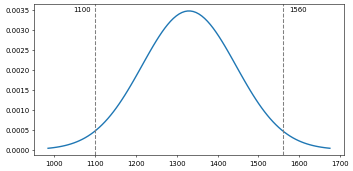

In [101]:
mu = 1330
sigma = 115
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

DPI=50
FIGSIZE=[8,4]

## All
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE, dpi=DPI)
#print(scipy.stats.norm.pdf(x, mu, sigma))
"""ax.plot(
    x, 
    scipy.stats.norm.pdf(x, mu, sigma),
)"""


sns.lineplot(
    ax=ax,
    x=x,
    y=scipy.stats.norm.pdf(x, mu, sigma),
    lw=2,
)

x=mu-2*sigma
ylim = ax.get_ylim()

ax.axvline(x=x, ls="--", color="grey", label="2 sigma")
ax.annotate(str(x),(x*0.99, ylim[1] * 0.95), ha="right")

x=mu+2*sigma
ax.axvline(x=x, ls="--", color="grey")
ax.annotate(str(x),(x*1.01, ylim[1] * 0.95), ha="left")

# Save
out_path = os.path.join(metadata_dir, "prior_denmark")
print(out_path)
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")